<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/DiD/Chapter2_DiD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install mxnet (GPU's required) 
# Reference: https://colab.research.google.com/github/d2l-ai/d2l-en-colab/blob/master/chapter_deep-learning-computation/use-gpu.ipynb#scrollTo=oR98Jmh0mzJ5
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.6

# 2.1 Data Manipulation



### 2.1.8 Exercises

1. Run the code in this section. Change the conditional statement X == Y in this section to X < Y or X > Y, and then see what kind of tensor you can get.

In [ ]:
from mxnet import np

X = np.arange(12).reshape(3,4)
Y = np.array([[2,1,4,3,],[1,2,3,4,],[4,3,2,1]])
rst1 = np.zeros_like(Y)
rst1 = X < Y
print(rst1, "type:", type(rst1), ",dtype:", (rst1).dtype, ",shape:", rst1.shape)
rst2 = np.zeros_like(Y)
rst2 = X > Y
print(rst2, "type:", type(rst2), ",dtype:", (rst2).dtype, ",shape:", rst2.shape)

[[ True False  True False]
 [False False False False]
 [False False False False]] type: <class 'mxnet.numpy.ndarray'> ,dtype: bool ,shape: (3, 4)
[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]] type: <class 'mxnet.numpy.ndarray'> ,dtype: bool ,shape: (3, 4)


2. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

In [ ]:
# Yes, the result's expected
"""When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing(i.e. rightmost) dimensions and works its way left.
Two dimensions are compatible when
1. they are equal, or
2. one of them is 1
"""
a = np.arange(9).reshape(3,1,3)
b = np.arange(6).reshape(3,2,1)
print(a)
print("------------")
print(b)
print("------------")
print(a+b)
print("------------")
print(a*b)

[[[0. 1. 2.]]

 [[3. 4. 5.]]

 [[6. 7. 8.]]]
------------
[[[0.]
  [1.]]

 [[2.]
  [3.]]

 [[4.]
  [5.]]]
------------
[[[ 0.  1.  2.]
  [ 1.  2.  3.]]

 [[ 5.  6.  7.]
  [ 6.  7.  8.]]

 [[10. 11. 12.]
  [11. 12. 13.]]]
------------
[[[ 0.  0.  0.]
  [ 0.  1.  2.]]

 [[ 6.  8. 10.]
  [ 9. 12. 15.]]

 [[24. 28. 32.]
  [30. 35. 40.]]]


#2.2 Data Preprocessing

### 2.2.5 Exercises
  - Create a raw dataset with more rows and columns.



In [ ]:
import os
import pandas as pd
from mxnet import np

os.makedirs(os.path.join('..','data'), exist_ok=True)
data_file = os.path.join('..','data', 'house_normal.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,BathRooms,ParkingLot,Price\n')
    f.write('NA,Pave,NA,Yes,127500\n')
    f.write('2,NA,1,No,116000\n')
    f.write('4,NA,1,Yes,178100\n')
    f.write('NA,NA,NA,NA,140000\n')
    f.write('NA,Pave,NA,No,127500\n')
    f.write('2,Pave,1,Yes,126000\n')
    f.write('4,NA,2,Yes,218100\n')
    f.write('6,NA,NA,NA,250000\n')
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley  BathRooms ParkingLot   Price
0       NaN  Pave        NaN        Yes  127500
1       2.0   NaN        1.0         No  116000
2       4.0   NaN        1.0        Yes  178100
3       NaN   NaN        NaN        NaN  140000
4       NaN  Pave        NaN         No  127500
5       2.0  Pave        1.0        Yes  126000
6       4.0   NaN        2.0        Yes  218100
7       6.0   NaN        NaN        NaN  250000


*   Delete the column with the most missing values.

In [ ]:
data = data.drop(data.isna().sum().idxmax(),axis=1)
print(data)

   NumRooms  BathRooms ParkingLot   Price
0       NaN        NaN        Yes  127500
1       2.0        1.0         No  116000
2       4.0        1.0        Yes  178100
3       NaN        NaN        NaN  140000
4       NaN        NaN         No  127500
5       2.0        1.0        Yes  126000
6       4.0        2.0        Yes  218100
7       6.0        NaN        NaN  250000


* Convert the preprocessed dataset to the tensor format.

In [ ]:
ins,outs = data.iloc[:,0:3], data.iloc[:,-1]
ins = ins.fillna(ins.mean())  # fill out na with mean. For columns whose type isn't numerical, NaN within such columns remains still.
ins = pd.get_dummies(ins, dummy_na=True)

# Convert preprocessed data to tensor(mxnet.numpy.ndarray)
X,y = np.array(ins.values), np.array(outs.values)
print("X:\n{}\n\ny:\n{}".format(X, y))
print(f'X format: {type(X)} and Y format: {type(Y)}')

X:
[[3.6  1.25 0.   1.   0.  ]
 [2.   1.   1.   0.   0.  ]
 [4.   1.   0.   1.   0.  ]
 [3.6  1.25 0.   0.   1.  ]
 [3.6  1.25 1.   0.   0.  ]
 [2.   1.   0.   1.   0.  ]
 [4.   2.   0.   1.   0.  ]
 [6.   1.25 0.   0.   1.  ]]

y:
[127500 116000 178100 140000 127500 126000 218100 250000]
X format: <class 'mxnet.numpy.ndarray'> and Y format: <class 'mxnet.numpy.ndarray'>


# 2.3 Linear Algebra

### 2.3.13 Exercises

1. Prove that the transpose of a matrix $A$'s transpose is $A:(A^T)^T=A$.
  - Let's say there is a random element $a_{ij}$ in $A$, it be $a_{ji}$ once transposed. Transposed again, $a_{ji}$ will be $a_{ij}$. Thus, all elements in $A$ is the same as ones in $(A^T)^T$.

2. Given two matrices $A$ and $B$, show that the sum of transpose is equal to the transpose of a sum: $A^T+B^T=(A+B)^T$.
  - Let's suppose $A$ and $B$ are matrices $\in R^{m\times n}$
\
\
$A=
\begin{pmatrix}
a_{11}&\cdots&a_{1n}\\
\vdots&\ddots&\vdots\\
a_{m1}&\cdots&a_{mn}
\end{pmatrix}$,
$B=
\begin{pmatrix}
b_{11}&\cdots&b_{1n}\\
\vdots&\ddots&\vdots\\
b_{m1}&\cdots&b_{mn}
\end{pmatrix}$
\
\
$A^T+B^T=
\begin{pmatrix}
a_{11}&\cdots&a_{m1}\\
\vdots&\ddots&\vdots\\
a_{1n}&\cdots&a_{mn}
\end{pmatrix}+
\begin{pmatrix}
b_{11}&\cdots&b_{m1}\\
\vdots&\ddots&\vdots\\
b_{1n}&\cdots&b_{mn}
\end{pmatrix}=
\begin{pmatrix}
a_{11}+b_{11}&\cdots&a_{m1}+b_{m1}\\
\vdots&\ddots&\vdots\\
a_{1n}+b_{1n}&\cdots&a_{mn}+b_{mn}
\end{pmatrix}$
\
\
$(A+B)^T=
\begin{pmatrix}
a_{11}+b_{11}&\cdots&a_{1n}+b_{1n}\\
\vdots&\ddots&\vdots\\
a_{m1}+b_{m1}&\cdots&a_{mn}+b_{mn}
\end{pmatrix}^T=
\begin{pmatrix}
a_{11}+b_{11}&\cdots&a_{m1}+b_{m1}\\
\vdots&\ddots&\vdots\\
a_{1n}+b_{1n}&\cdots&a_{mn}+b_{mn}
\end{pmatrix}$
\
\
Thus, $A^T+B^T = (A+B)^T$

3. Given any square matrix $A$, is $A+A^T$ always symmetric? Why?
  - A definition of being a symmetric matrix is, $A$ is symmetric $\leftrightarrow A=A^T$: $a_{ij}=a_{ji}$ for every $i$,$j$.
  - Given a square matrix $A$, a random element $a_{ij}$ in $A$ is tranposed to $a_{ji}$ in $A^T$. And so $A+A^T$ has $a_{ij}+a_{ji}$ for $i^{th}$ row and $j^{th}$ column.
  - A random element $a_{ji}$ in $A$ is tranposed to $a_{ij}$ in $A^T$. And so $A+A^T$ has $a_{ji}+a_{ij}$ for $j^{th}$ row and $i^{th}$ column.
  - Because the entry of $i^{th}$ row and $j^{th}$ column and the entry of $j^{th}$ row and $i^{th}$ column are equal, $A+A^T$ is symmetric.

4. We defined the tensor X of shape (2, 3, 4) in this section. What is the output of len(X)?
  - 2

In [ ]:
from mxnet import np
X = np.ones(shape=(2,3,4))
print(len(X))

2


5. For a tensor X of arbitrary shape, does len(X) always correspond to the length of a certain axis of X? What is that axis?
  - Yes, the very first dimension

6. Run A / A.sum(axis=1) and see what happens. Can you analyze the reason?
  - This caculation doesn't work because A.sum(axis=1) is a vector of (5,) that lost its axe so it cannot be broadcast to run A / A.sum(axis=1). A.sum(axis=1) has to be reshaped as a matrix of (5,1) for computation.

In [ ]:
from mxnet import np
A = np.arange(20).reshape(5, 4)
#print(A/A.sum(axis=1))
print(A/A.sum(axis=1).reshape(-1,1))

[[0.         0.16666667 0.33333334 0.5       ]
 [0.18181819 0.22727273 0.27272728 0.3181818 ]
 [0.21052632 0.23684211 0.2631579  0.28947368]
 [0.22222222 0.24074075 0.25925925 0.2777778 ]
 [0.22857143 0.24285714 0.25714287 0.27142859]]


7. When traveling between two points in Manhattan, what is the distance that you need to cover in terms of the coordinates, i.e., in terms of avenues and streets? Can you travel diagonally?
  - The distance is $\sqrt{||streets||^2 + ||avenues||^2}$, which is a $L_2$ norm.
  - You can travel diagonally if there's no building/structures/obstacles in a way, which is very unlikely in Manhattan.

8. Consider a tensor with shape (2, 3, 4). What are the shapes of the summation outputs along axis 0, 1, and 2?
  - (3,4), (2,4), (2,3) respectively.

In [ ]:
from mxnet import np
aTensor = np.ones((2,3,4))
print(aTensor.sum(axis=0).shape)
print(aTensor.sum(axis=1).shape)
print(aTensor.sum(axis=2).shape)

(3, 4)
(2, 4)
(2, 3)


9. Feed a tensor with 3 or more axes to the linalg.norm function and observe its output. What does this function compute for tensors of arbitrary shape?
  - L2 norm for every element in the tensor.

In [ ]:
from mxnet import np
A = np.arange(40).reshape(4,2,5)
B = np.ones(shape=(4,2,5))
print(np.linalg.norm(A))
print(np.linalg.norm(B))

143.31783
6.3245554


# 2.4 Calculus

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


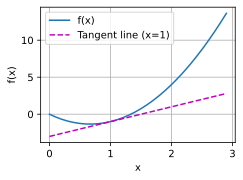

In [ ]:
%matplotlib inline
from IPython import display
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

def f(x):
    return 3*x**2-4*x

def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h

h = 0.1
for i in range(5):
    print(f"h={h:.5f}, numerical limit={numerical_lim(f,1,h):.5f}")
    h=h*0.1

def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')
    # What is svg file format? Scalable Vector Graphics(svg) is a vector image file format.
    # A vector image uses geometric forms such as points, lines, curves and shapes to represent different parts of the image as
    # discrete objects. These forms can be individually edited. A vector image remains crisp and clear at any resolution or size.

def set_figsize(figsize=(3.5,2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams["figure.figsize"] = figsize
    #rcParams means runtime configuration parameters. rcParamas["figure.figsize"] has [6.4, 4.8] as a default figuration size (width, height in inches).

def set_axes(axes, xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale) #Set the x-axis scale: (linear, log, symlog, ...)
    axes.set_yscale(yscale) #Set the y-axis scale.
    axes.set_xlim(xlim) # Set the x-axis view limits.
    axes.set_ylim(ylim) # Set the y-axis view limits.
    if legend:
        axes.legend(legend)
    axes.grid() # Whether or not show the grid lines.

def plot(X, Y=None, xlabel=None, ylabel=None,legend=None, xlim=None,
         ylim=None, xscale='linear',yscale='linear',
         fmts=('-','m--','g-.','r:'), figsize=(3.5,2.5),axes=None):
    """plot data points."""
    if legend is None:
        legend = []
  
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()  # Get the current Axes instance on the current figure matching the given keyword args, or create one.

    # Return True if 'X' (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X,'ndim') and X.ndim==1 or isinstance(X,list) and not hasattr(X[0],"__len__"))
        # The hasattr() method returns true if an object has the given named attribute and false if it does not.

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X,Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y=[Y]
    if len(X) != len(Y):
        X = X*len(Y)
    axes.cla()  # clear the current axes
    for x,y, fmt in zip(X,Y, fmts):
        if len(x):
            axes.plot(x,y,fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

###2.4.6 Exercises

1. Plot the function  $y=f(x)=x^3−\frac{1}{x}$  and its tangent line when  $x=1$.

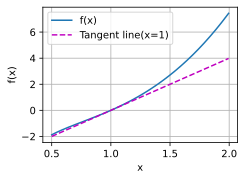

In [ ]:
%matplotlib inline
from IPython import display
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

def f(x):
    return x**3-1/x


def use_svg_display():
    """Use the svg format to display a plot in Jupyter. The svg format stands for Scalable Vector Graphics, and is a vector image file format. 
    A vector image uses geometric forms such as points, lines, curves and shapes to represent different parts of the image as discrete objects.
    These forms can be individually edited. A vector image remains crisp and clear at any resolution or size."""
    display.set_matplotlib_formats('svg')


def set_figsize(figsize):
    """Set the figure size for matpotlib."""
    use_svg_display()
    d2l.plt.rcParams["figure.figsize"] = figsize
    #rcParams means runtime configuration parameters. rcParams["figure.figsize"] has [6.4,4.8] as a default figuration size(width,height in inches).


def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale) # Set the x-axis scale: linear, log, symlog, ...
    axes.set_yscale(yscale) # Set the y-axis scale
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid() # Whether or not show th grid lines.


def has_one_axis(X):
    """Return True if 'X' either (X has a single dimension) or (X is list and X[0] not have __len__ attribute)'"""
    return (hasattr(X,'ndim') and X.ndim==1 or isinstance(X,list) and not hasattr(X[0],"__len__"))


def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear',fmts=('-','m--'), figsize=(3.5,2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()  # Get the current axes instance on the current figure matching the given kwargs, or create one.

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X,Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X*len(Y)
    axes.cla()  # Clear the current axes

    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x,y,fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)

x = np.arange(0.5,2,0.005)
plot(x, [f(x), 4*x-4],'x', 'f(x)', legend=['f(x)', 'Tangent line(x=1)'])

2. Find the gradient of the function  $f(x)=3x^2_1+5e^{x_2}$.
  - $\nabla_x f(x) = [\frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2}]^T = [6x_1, 5e^{x_2}]^T$, where $x = [x_1,x_2]^T$

3. What is the gradient of the function $f(x) = ||x||_2$?
  - $\nabla_x ||x||_2 = \frac{\partial}{\partial x}\sqrt{x^T\cdot x} = \frac{1}{||x||}[x_1,x_2]^T$

4. Can you write out the chain rule for the case where  $u = f(x,y,z)$  and  $x = x(a,b)$ ,  $y = y(a,b)$ , and  $z = z(a,b)$?
  - $\frac{\partial u}{\partial a} = \frac{\partial u}{\partial x}\frac{\partial x}{\partial a} + \frac{\partial u}{\partial y}\frac{\partial y}{\partial a} + \frac{\partial u}{\partial z}\frac{\partial z}{\partial a}$
  - $\frac{\partial u}{\partial b} = \frac{\partial u}{\partial x}\frac{\partial x}{\partial b} + \frac{\partial u}{\partial y}\frac{\partial y}{\partial b} + \frac{\partial u}{\partial z}\frac{\partial z}{\partial b}$

#2.5 Automatic differentiation

In [ ]:
from mxnet import autograd, np, npx

npx.set_np()
x = np.arange(4.0)

x.attach_grad()
x.grad  # Compute the gradients of heads w.r.t variables. Gradients will be returned as new NDArrays instead of stored into variable.grad. 
       # Supports recording gradient graph for computing higher order gradients.

with autograd.record(): # Returns an autograd recording scope context to be used in ‘with’ statement and captures code that needs gradients to be calculated.
    y = 2 * np.dot(x,x)
y.backward()  # Compute the gradients of heads w.r.t previously marked variables.

with autograd.record():
    y = x.sum()
y.backward()
x.grad == 1

with autograd.record():
    y = x * x # ([x^2_1, x^2_2, x^2_3, x^2_4]^T)
y.backward()

with autograd.record():
    y = x * x
    u = y.detach()  # return a new NDarray, detached from the current graph
    z = u * x
print("default x: ", x)
print("u = y.detach=", u)
print(x.grad == u)
print(x.grad == 2*x)
y.backward()
print(x.grad == 2*x)
print(x)
z.backward()
print(x.grad)

def f(a):
    b = a*2
    while np.linalg.norm(b) < 1000:
          b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = np.random.normal()
a.attach_grad()
with autograd.record():
      d = f(a)
d.backward()
a.grad == d/a

default x:  [0. 1. 2. 3.]
u = y.detach= [0. 1. 4. 9.]
[ True False  True False]
[ True  True  True  True]
[ True  True  True  True]
[0. 1. 2. 3.]
[0. 1. 4. 9.]


array(True)

###2.5.13 Exercises

1. Why is the second derivative much more expensive to compute than the first derivative?
  - Let's say we are trying to compute a second derivative of C: $\frac{\partial^2 C}{(\partial v_j)(\partial v_k)}$. If there are a million such $v_j$ variables, then the number of computations for the second derivatie would be half a trillion: a half of million * million, $\frac{\partial^2 C}{(\partial v_j)(\partial v_k)} = \frac{\partial^2 C}{(\partial v_k)(\partial v_j)}$.

2. After running the function for backpropagation, immediately run it again and see what happens.
  - By default, backward() does not clear the computaion history so you cannot call the function again with no information.

In [ ]:
from mxnet import np, npx

npx.set_np()
x = np.arange(4.0)
x.attach_grad()
with autograd.record():
    y = x**2
    z = y.grad
y.backward()
y.backward()
print(x.grad)

MXNetError: ignored

3. In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or matrix. At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?
  - f(a) will follow the form of a. For example, if a is a vector, then f(a) will be the vector with the same dimension of $a$. Thus, there is nothing special to analyze, unless you do matrix calculus. This is because you have to carefully pick which convention you would like to use: either numerator layout or denominator layout.

In [ ]:
from mxnet import autograd, np, npx

npx.set_np()

def f(a):
    b = a*2
    while np.linalg.norm(b) < 1000:
          b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

# Let's suppose a is a vector of the dimension of 4: (4,)
a = np.random.normal(size=(4,))
a.attach_grad()
with autograd.record():
      d = f(a)
d.backward()
print("When a is a vector:\n",  a.grad==d/a)

# Let's suppose b is a matrix of the dimension of 4: (2,2)
b = np.random.normal(size=(2,2))
b.attach_grad()
with autograd.record():
      c = f(b)
c.backward()
print("\nWhen a is a matrix: \n", b.grad==c/b)

When a is a vector:
 [ True  True  True  True]

When a is a matrix: 
 [[ True  True]
 [ True  True]]


4. Redesign an example of finding the gradient of the control flow. Run and analyze the result.

In [ ]:
from mxnet import np,npx

npx.set_np()

def f(a):
    b = a**2 + 2*a + 5
    if True:
        b = 4 * b
    i = 0
    while i < 9:
          b = 2*b
          i += 1
    return b

# Let's suppose a is a vector of the dimension of 4: (4,)
a = np.arange(4.0).reshape(4,)
a.attach_grad()
with autograd.record():
      d = f(a)
d.backward()
print("When a is a vector:\n",  a.grad==2**9*4*(2*a+2))

When a is a vector:
 [ True  True  True  True]


5.  Let $f(x) = \sin(x)$. Plot $f(x)$ and  $\frac{\partial f(x)}{\partial x}$, where the latter is computed without exploiting that $f'(x) = \cos(x)$.

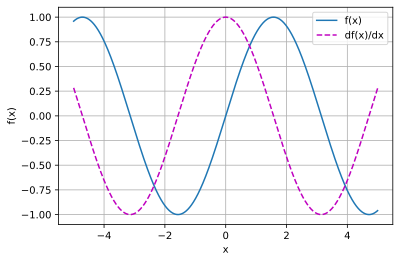

In [ ]:
%matplotlib inline
from  IPython import display
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

def foo(x):
    return np.sin(x)

def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-','m--'), axes=None):
    if legend is None:
        legend = []
    use_svg_display()
    axes = axes if axes else d2l.plt.gca()  # Get the current axes instance on the current figure matching the given kwargs, or create one.
    Y.append(X.grad)
    X = [X]*2
    axes.cla()  # clear the current axes
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x, y, fmt)
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)


x = np.arange(-5,5,0.005)
x.attach_grad()
with autograd.record():
      f = np.sin(x)
f.backward()
plot(x, [foo(x)],'x','f(x)',legend=['f(x)','df(x)/dx'])

# 2.6 Probability

###2.6.5 Exercises

1. We conducted $m=500$ groups of experiments where each group draws $n=10$ samples. Vary $m$ and $n$. Observe and analyze the experimental results.
  - As $n$ increases, each entry value is being close as a factor of 0.167. Also, each probability of each entry becomes close to 0.167 as $m$ increases.
  - Thus, $m$ and $n$ are proportional to reaching the true probability of 0.167

[[0.18       0.1        0.28       0.16       0.14       0.14      ]
 [0.2        0.15       0.2        0.16       0.13       0.16      ]
 [0.17333333 0.14666666 0.18666667 0.18       0.16       0.15333334]
 ...
 [0.16621242 0.16436873 0.17006011 0.16739479 0.16629258 0.16567135]
 [0.16614614 0.1643043  0.17003003 0.16744745 0.16638638 0.16568568]
 [0.16612    0.16422    0.17       0.16742    0.16654    0.1657    ]]


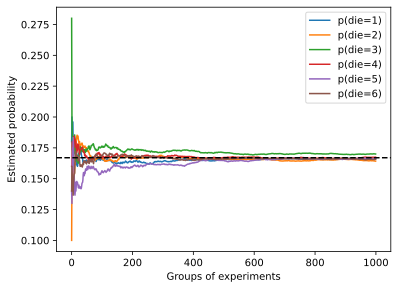

In [28]:
%matplotlib inline


import random
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

fair_chance = [1.0/6] * 6 
counts = np.random.multinomial(50, fair_chance, 1000) 
cum_counts = counts.cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)


d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].asnumpy(), label=("p(die="+str(i+1)+")"))
d2l.plt.plot()
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend(); # Semicolon removes unnecessary output from plt. It works as plt.show()

2. Given two events with probability $P(A)$ and $P(B)$, compute upper and lower bounds on $P(A\cup B)$ and $P(A\cap B)$. (Hint: display the situation using a Venn Diagram.)
  - $0 \leq P(A\cup B),P(A\cap B) \leq 1$
  - $P(A) + P(B) - P(A\cap B) \leq P(A\cup B) \leq P(A) + P(B)$
  - $P(A\cap B) \leq P(A)$ and $P(B)$

3. Assume that we have a sequence of random variables, say $A$, $B$, and  $C$, where $B$ only depends on $A$, and $C$ only depends on $B$, can you simplify the joint probability $P(A,B,C)$ ? (Hint: this is a Markov Chain.)
  - $A$ and $C$ are conditionally independent given $B$. $P(A,C|B) = P(A|B)P(C|B) = \frac{P(A,B,C)}{P(B)} \to P(A,B,C) = P(B)P(A|B)P(C|B)$

4. In Section 2.6.2.6, the first test is more accurate. Why not run the first test twice rather than run both the first and second tests?
  - Running the first test twice is better becasue it gives 93% of accuracy compared to 83% from the two different tests. Let's compute $P(H=1|D_1=1,D^2_1=1)$, where $D^2_1$ is the second trial of the first test.
  - $P(H=1|D_1=1,D^2_1=1) = \frac{P(D_1=1,D^2_1=1,H=1)}{P(D_1=1,D^2_1=1)} = \frac{P(D_1=1,D^2_1=1,H=1)}{P(D_1=1,D^2_1=1,H=1)+P(D_1=1,D^2_1=1,H=0)} = \frac{P(D_1=1,D^2_1=1|H=1)P(H=1)}{P(D_1=1,D^2_1=1|H=1)P(H=1)+P(D_1=1,D^2_1=1|H=0)P(H=0)}$. 
  \
  Because $D_1$ and $D^2_1$ are indepdent to each other, $\frac{P(D_1=1|H=1)P(D^2_1=1|H=1)P(H=1)}{P(D_1=1|H=1)P(D^2_1=1|H=1)P(H=1)+P(D_1=1|H=0)P(D^2_1=1|H=0)P(H=0)} = \frac{1*1*0.0015}{1*1*0.0015 + 0.01*0.01*0.9985}= 0.9375$

# 2.7 Documentation

### 2.7.4 Exercises

1. Look up the documentation for any function or class in the deep learning framework. Can you also find the documentation on the official website of the framework?
  - Yes, one of examples would be "https://mxnet.apache.org/versions/1.0.0/api/python/ndarray/ndarray.html"